# Рейтинг роста и падения абсолютных курсов валют

Проект:	**Абсолютный курс**
	
сайт	http://www.abscur.ru

ВКонтакте	https://vk.com/abscur

FaceBook	https://www.facebook.com/abscur

WhatsUp	https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber	https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram	https://t.me/AbsCur

Одноклассники	https://ok.ru/group/53547043520717

Twitter	https://twitter.com/abscurs

GitHub	https://github.com/prog815/abscur

YouTube	https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW

# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import lib_abscur_post
from datetime import date

# Стоимость Абса в выражении различных валют

In [2]:
data = pd.read_csv('../input/abscur-last/abscur_last.csv',index_col=0)
data

,курс на 2022-01-14,% изм.день,% изм.неделя,% изм.месяц,% изм.квартал,% изм.полгода,% изм.год
AUD,13.600379,0.000964,0.006587,0.010235,-0.001494,0.006647,-0.012992
CAD,14.934449,0.000777,0.007825,0.014127,0.005898,0.033238,0.065879
HKD,2.398466,0.001645,-0.008176,-0.012477,0.015563,0.023648,0.046198
JPY,0.163673,0.006106,0.005520,-0.017287,0.014242,-0.012703,-0.044562
SEK,2.092200,0.002304,0.013985,0.008537,-0.016807,-0.004166,-0.021255
USD,18.677397,0.001050,-0.010013,-0.014215,0.016651,0.026268,0.050146
CHF,20.500648,0.004488,0.001431,0.000037,0.031530,0.034011,0.022757
EUR,21.396851,0.002769,0.004424,0.003184,0.004892,-0.004554,-0.010369
CNY,2.939280,0.001125,-0.006084,-0.012937,0.029947,0.042780,0.068227
CZK,0.873106,-0.008339,0.001208,0.029821,0.040316,0.032627,0.055614


In [3]:
text = ''

In [4]:
def get_rep(d):
    d = d.copy()*100
    d.sort_values(ascending=True,inplace=True)
    _=d.plot.bar(figsize=(15,5),grid=True,title='Изменение (' + d.name + ')',ylabel='%')
    text = ''
    text += 'самые упавшие: ' + ', '.join([cur + ' ' + str(np.round(izm,1)) + '%' for cur,izm in d.iloc[:3].reset_index().values]) + ';\n'
    text += 'самые стабильные: ' + ', '.join([cur + ' ' + str(np.round(izm,2)) + '%' for cur,izm in d[abs(d).sort_values().index[:3].values].reset_index().values]) + ';\n'
    text += 'самые подросшие: ' + ', '.join([cur + ' ' + str(np.round(izm,1)) + '%' for cur,izm in d.iloc[-3:].reset_index().values]) + '.\n'
    return text

Рейтинг за день:
самые упавшие: TRY -2.4%, RUB -2.2%, CZK -0.8%;
самые стабильные: ARS 0.01%, KZT -0.02%, UAH -0.02%;
самые подросшие: CHF 0.4%, JPY 0.6%, CLP 1.0%.



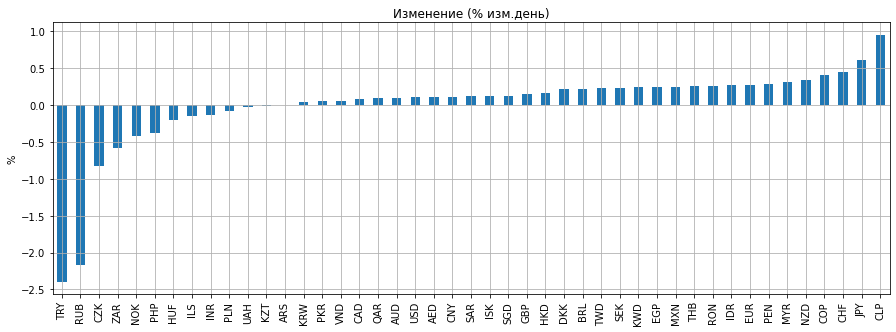

In [5]:
res = 'Рейтинг за день:\n' + get_rep(data.iloc[:,1])
print(res)
text += res

Рейтинг за неделю:
самые упавшие: UAH -2.0%, ARS -1.5%, AED -1.0%;
самые стабильные: THB 0.05%, IDR -0.09%, SGD 0.11%;
самые подросшие: CLP 1.6%, BRL 1.8%, HUF 2.0%.



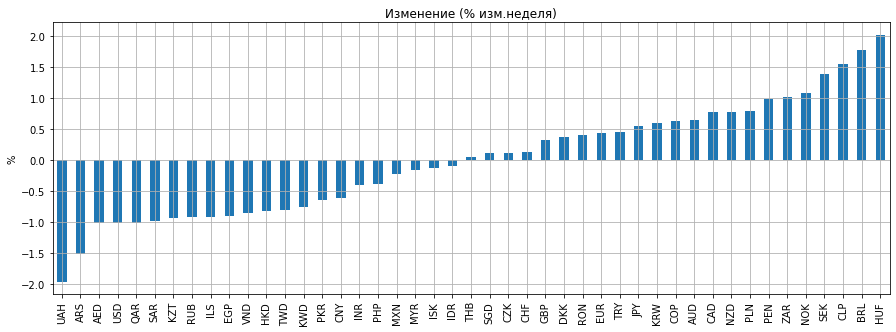

In [6]:
res = 'Рейтинг за неделю:\n' + get_rep(data.iloc[:,2])
print(res)
text += res

Рейтинг за месяц:
самые упавшие: RUB -4.7%, UAH -4.2%, ARS -3.4%;
самые стабильные: CHF 0.0%, MYR -0.1%, VND -0.16%;
самые подросшие: NOK 3.0%, HUF 4.0%, TRY 4.3%.



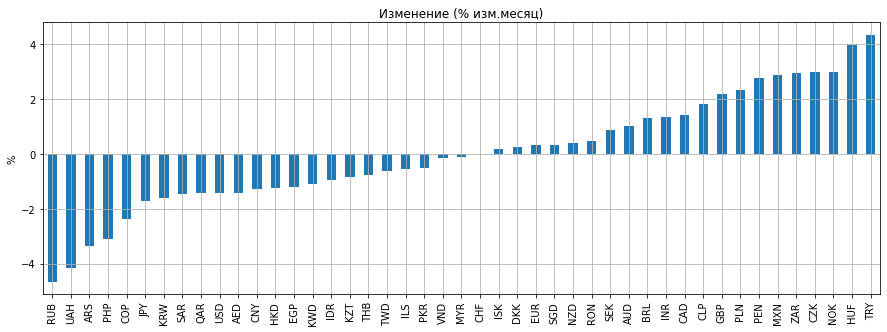

In [7]:
res = 'Рейтинг за месяц:\n' + get_rep(data.iloc[:,3])
print(res)
text += res

Рейтинг за квартал:
самые упавшие: TRY -31.2%, RUB -4.9%, COP -3.6%;
самые стабильные: AUD -0.15%, IDR 0.26%, KZT -0.48%;
самые подросшие: TWD 3.2%, CZK 4.0%, ILS 5.2%.



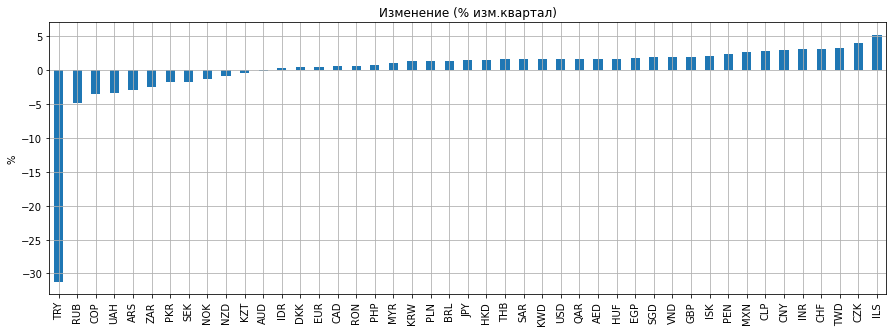

In [8]:
res = 'Рейтинг за квартал:\n' + get_rep(data.iloc[:,4])
print(res)
text += res

Рейтинг за полгода:
самые упавшие: TRY -35.3%, PKR -7.2%, BRL -5.1%;
самые стабильные: RUB 0.03%, SEK -0.42%, NZD 0.43%;
самые подросшие: PEN 4.5%, IDR 4.7%, ILS 8.1%.



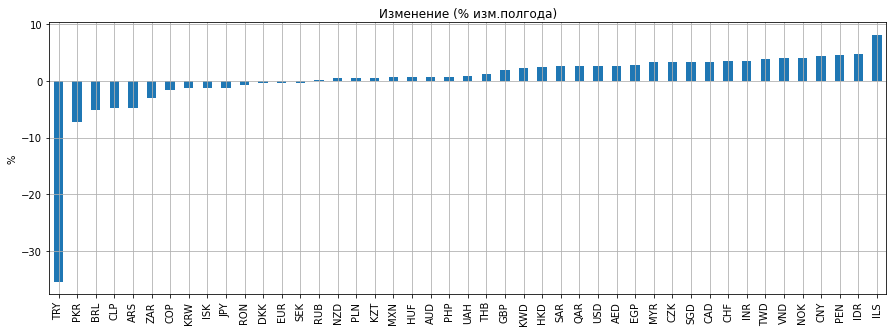

In [9]:
res = 'Рейтинг за полгода:\n' + get_rep(data.iloc[:,5])
print(res)
text += res

Рейтинг за год:
самые упавшие: TRY -42.8%, ARS -13.4%, COP -8.0%;
самые стабильные: NZD 0.19%, HUF 0.56%, BRL 0.66%;
самые подросшие: VND 6.7%, TWD 6.7%, CNY 6.8%.



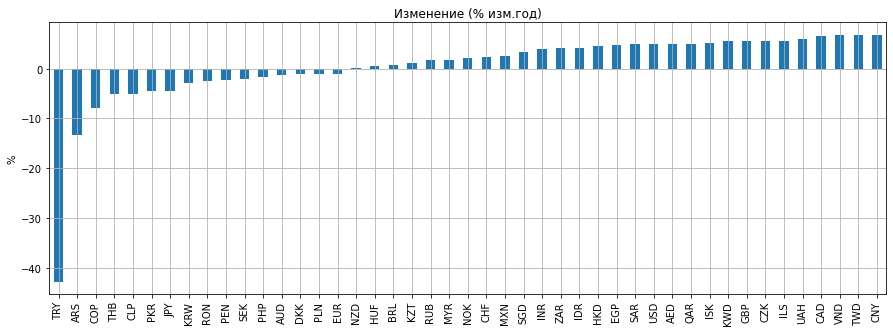

In [10]:
res = 'Рейтинг за год:\n' + get_rep(data.iloc[:,6])
print(res)
text += res

# Публикация по каналам проекта

In [11]:
title = 'Рейтинг роста и падения абсолютных курсов на ' + str(data.columns[0])[-10:]
message = text
link = 'https://www.kaggle.com/eavprog/abscur-rate-up-down'
print(title + '\n\n' + message + '\n\n' + link)

Рейтинг роста и падения абсолютных курсов на 2022-01-14

Рейтинг за день:
самые упавшие: TRY -2.4%, RUB -2.2%, CZK -0.8%;
самые стабильные: ARS 0.01%, KZT -0.02%, UAH -0.02%;
самые подросшие: CHF 0.4%, JPY 0.6%, CLP 1.0%.
Рейтинг за неделю:
самые упавшие: UAH -2.0%, ARS -1.5%, AED -1.0%;
самые стабильные: THB 0.05%, IDR -0.09%, SGD 0.11%;
самые подросшие: CLP 1.6%, BRL 1.8%, HUF 2.0%.
Рейтинг за месяц:
самые упавшие: RUB -4.7%, UAH -4.2%, ARS -3.4%;
самые стабильные: CHF 0.0%, MYR -0.1%, VND -0.16%;
самые подросшие: NOK 3.0%, HUF 4.0%, TRY 4.3%.
Рейтинг за квартал:
самые упавшие: TRY -31.2%, RUB -4.9%, COP -3.6%;
самые стабильные: AUD -0.15%, IDR 0.26%, KZT -0.48%;
самые подросшие: TWD 3.2%, CZK 4.0%, ILS 5.2%.
Рейтинг за полгода:
самые упавшие: TRY -35.3%, PKR -7.2%, BRL -5.1%;
самые стабильные: RUB 0.03%, SEK -0.42%, NZD 0.43%;
самые подросшие: PEN 4.5%, IDR 4.7%, ILS 8.1%.
Рейтинг за год:
самые упавшие: TRY -42.8%, ARS -13.4%, COP -8.0%;
самые стабильные: NZD 0.19%, HUF 0.56%, BRL 0

In [12]:
if(date.today().toordinal() % 3 == 0):
    lib_abscur_post.postToChanels(title, message, link)